**Question 1:** Is there a statistically significant difference in the domestic box office between movies with Original Screenplay and those with Based on TV as their movie source? Generate the appropriate statistical test for comparing only two means (not two or more means). 

Answer: Yes; |t| > 1.96



In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv("https://www.dropbox.com/s/rwxkpqam7yn77m2/Movie.csv?dl=1")
df.head()



,movie_production_year,movie_financial_summary_production_budget,movie_financial_summary_domestic_box_office,movie_financial_summary_international_box_office,production_date_year,movie_creative_type_display_name,movie_source_display_name,movie_production_method_display_name,movie_genre_display_name
0,2010,10100000,1183658,17542642,1/1/2010,Contemporary Fiction,Original Screenplay,Live Action,Romantic Comedy
1,2001,10350000,33201661,141000000,1/1/2001,Contemporary Fiction,Original Screenplay,Live Action,Comedy
2,2007,10500000,11052958,3087444,1/1/2007,Contemporary Fiction,Original Screenplay,Live Action,Comedy
3,2013,10600000,24084,237280,1/1/2013,Science Fiction,Original Screenplay,Live Action,Thriller/Suspense
4,2002,10600000,22163442,12245764,1/1/2002,Contemporary Fiction,Original Screenplay,Live Action,Horror


In [ ]:
original_screenplay = df[df['movie_source_display_name'] == 'Original Screenplay']
based_on_tv = df[df['movie_source_display_name'] == 'Based on TV']

t, p = stats.ttest_ind(original_screenplay.movie_financial_summary_domestic_box_office, based_on_tv.movie_financial_summary_domestic_box_office)

print('\nt:'+str(round(t,3)))
print('p:'+str(round(p,3)))


t:-4.909
p:0.0


**Question 2**: Is there a statistically significant difference in the Domestic Box Office between Western and Adventure genres? Generate the appropriate statistical test for comparing only two means (not 2 or more means). 

Answer: Yes; |t| > 1.96 (t = -4.909)






 


In [ ]:
western = df[df['movie_genre_display_name'] == 'Western']
adventure = df[df['movie_genre_display_name'] == 'Adventure']

t, p = stats.ttest_ind(western.movie_financial_summary_domestic_box_office, adventure.movie_financial_summary_domestic_box_office)

print('\nt:'+str(round(t,3)))
print('p:'+str(round(p,3)))


t:-2.324
p:0.021


**Question 3:** What is the effect size from question 2 (round to 3 decimals?)

Answer: The effect size for the T-test above is -2.324.



**Question 4:** We need to assess the relationship between the movie production method (animation/live action, digital animation, hand animation, live action, rootscoping, stop-motion animation) and the domestic box office. In other words, does the production method effect the domestic box office? Run the appropriate statistical test to determine whether there is a difference in Domestic Box Office across all types of Movie Production Methods at once.

What is the effect size score from this test (round to 3 decimals)?

Answer: 79.933


In [ ]:
groups = df['movie_production_method_display_name'].unique() 
group_labels = []              
for g in groups:               
  group_labels.append(df[df['movie_production_method_display_name'] == g]['movie_financial_summary_domestic_box_office'])
f, p =  stats.f_oneway(*group_labels)

print('F: ' + str(round(f, 3)))
print('p: ' + str(round(p, 3)))

F: 79.933
p: 0.0


**Question 5:** Is the effect size generated in question 4 reliable? In other words, would we expect to see a similar effect size in future samples that are similar to this one?

Answer: Yes, the p-value is less than 0.05, so the effect size is statistically significant for this sample. It is possible that a different sample could have a different effect size than the current sample given that effect sizes vary depending on a number of factors such as normality of distribution.

**Question 6:** 

In the same graph, visualize the Action, Documentary, and Adventure genres production budget for both 2010 and 2016. Order the graph in the following order: Action, Adventure, Dcoumentary. Include a title and appropriate x and y axis labels.

Print above the graph the average production budget for each genre and the year 2010 and 2016. For example, show the average production buget for Action in 2010, the average production budget for Action in 2016, the average production budget for Adventure in 2010, etc.).


movie_genre_display_name  movie_production_year
Action                    2010                      76192000.0
                          2016                      61400000.0
Adventure                 2010                     115500000.0
                          2016                     157500000.0
Documentary               2010                      80000000.0
Name: movie_financial_summary_production_budget, dtype: float64


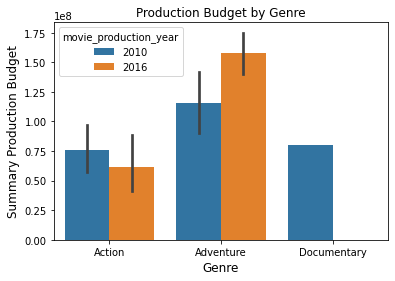

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = df[((df['movie_genre_display_name'] == 'Action') | (df['movie_genre_display_name'] == 'Documentary') | (df['movie_genre_display_name'] == 'Adventure'))
         & ((df['movie_production_year'] == 2010) | (df['movie_production_year'] == 2016))]

sns.barplot(x = 'movie_genre_display_name', y = 'movie_financial_summary_production_budget', hue = 'movie_production_year', data = plot_df)

plt.title('Production Budget by Genre')
plt.ylabel('Summary Production Budget', size = 12)
plt.xlabel('Genre', size = 12)

print(plot_df.groupby(['movie_genre_display_name', 'movie_production_year']).mean()['movie_financial_summary_production_budget'])
plt.show()



Screenshot of the graph from question 6.

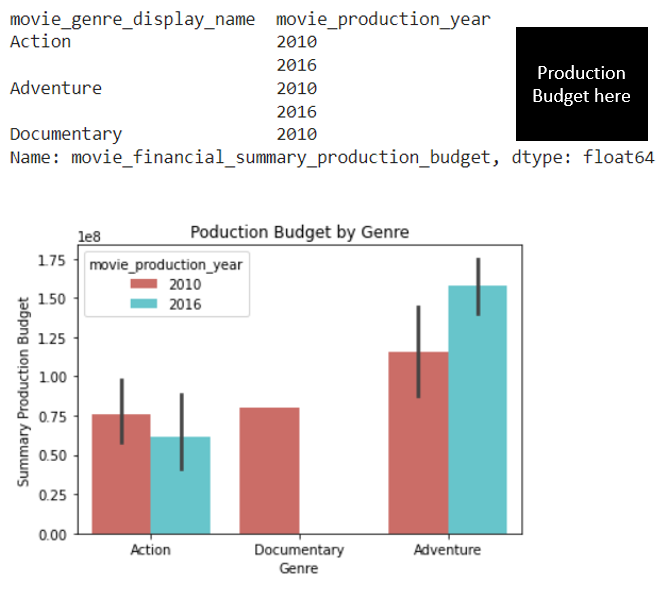

**Question 7**

Use Tukey's HSD post hoc comparison test to compare the domestic box office  and the movie production method. How many groupings do NOT have a statistically significant difference between their means?

Answer: 8


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['movie_financial_summary_domestic_box_office'],
                          groups=df['movie_production_method_display_name'],
                          alpha=0.05)

print(tukey)

                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
        group1                group2            meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------------------------------------
Animation/Live Action     Digital Animation  -53165367.3601  0.001  -83522679.4726  -22808055.2476   True
Animation/Live Action        Hand Animation -153040387.9457  0.001 -202247273.8294 -103833502.0619   True
Animation/Live Action           Live Action -137056503.4044  0.001 -160419812.1271 -113693194.6817   True
Animation/Live Action           Rotoscoping   -188862610.25 0.1075 -399195589.3396   21470368.8396  False
Animation/Live Action Stop-Motion Animation -150111775.3611  0.001 -223447929.2696  -76775621.4526   True
    Digital Animation        Hand Animation  -99875020.5856  0.001 -147853596.3516  -51896444.8196   True
    Digital Animation           Live Action  -

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
